<a href="https://colab.research.google.com/github/jasonbc94/Data_Science_Projects/blob/main/Car_Crash_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Jason Christian

Car crash data for the city of Cincinnati

Kaggle data set: https://www.kaggle.com/datasets/steverusso/cincinnati-car-crash-data?resource=download


Context:
All reported Cincinnati, Ohio car crashes since 2010.
This dataset includes fatal, injury, and non-injury crashes.


*   What sort of characteristics are correlated with car crashes and their severity level?
*   What type of accidents are most common? And how do time of day, driving conditions, and other variables relate to the type of crash?


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
car_crashes = pd.read_csv("/content/drive/MyDrive/cincinnati_traffic_crash_data__cpd.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/cincinnati_traffic_crash_data__cpd.csv'

Shows information about the data set

Begins cleaning up the file:
*   Drops irrelevant columns
*   Deletes rows with blanks
*   Checks for duplicate rows and deletes if present

In [ ]:
import numpy as np
import pandas as pd

x_val = [20,40,60,80]
y_val = [0.19,	1.25,	1.56,	2.32]
np.corrcoef(x_val, y_val)

array([[1.        , 0.97959079],
       [0.97959079, 1.        ]])

In [ ]:
print("Original dataframe:\n", car_crashes.shape,"\n")

#dropped irrelevant columns
car_crashes = car_crashes.drop(["INJURIES","Unnamed: 0","ADDRESS_X", "COMMUNITY_COUNCIL_NEIGHBORHOOD", "CPD_NEIGHBORHOOD", "SNA_NEIGHBORHOOD", "ZIP", "LATITUDE_X", "LONGITUDE_X", "INSTANCEID","LOCALREPORTNO", "DATECRASHREPORTED", "CRASHSEVERITYID", "TYPEOFPERSON", "ROADCONTOUR", "CRASHLOCATION"], axis = 1)
print("Remove irrelevant columns:\n",car_crashes.shape, "\n")

car_crashes = car_crashes.dropna()
print("Remove rows with missing values:\n",car_crashes.shape, "\n")

car_crashes.drop_duplicates(inplace = True)
print("Remove duplicate values:\n",car_crashes.shape, "\n")


print("Columns with null values in dataframe:\n",car_crashes.isnull().sum(), "\n")


Original dataframe:
 (258672, 27) 

Remove irrelevant columns:
 (258672, 11) 

Remove rows with missing values:
 (229683, 11) 

Remove duplicate values:
 (221081, 11) 

Columns with null values in dataframe:
 AGE                       0
CRASHDATE                 0
CRASHSEVERITY             0
DAYOFWEEK                 0
GENDER                    0
LIGHTCONDITIONSPRIMARY    0
MANNEROFCRASH             0
ROADCONDITIONSPRIMARY     0
ROADSURFACE               0
WEATHER                   0
UNITTYPE                  0
dtype: int64 



Convert objects in columns to be integer/float types

**Noted that assigning numerical values to various independent variables can create weighting that might skew data (For example the days of the week)

** Need to figure out how to incorporate time of day into analysis

In [ ]:
le = LabelEncoder()
manner_of_crash = le.fit_transform(car_crashes['MANNEROFCRASH'])
print('Manner of Crash:', car_crashes['MANNEROFCRASH'])
print('Label Encoder:', manner_of_crash)

ohe = OneHotEncoder(sparse=False)
ohe_manner = ohe.fit_transform(manner_of_crash.reshape(-1, 1))
print('One Hot Encoder:\n', ohe_manner)

lb = LabelBinarizer()
print('Label Binarizer:\n', lb.fit_transform(manner_of_crash))

manner_df = pd.DataFrame(ohe_manner, columns=le.classes_)
print(manner_df)

Manner of Crash: 0                                              2 - REAR-END
1         1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES I...
2                             7 - SIDESWIPE, SAME DIRECTION
3                             7 - SIDESWIPE, SAME DIRECTION
4                                                 6 - ANGLE
                                ...                        
258665                                         2 - REAR-END
258667                                         2 - REAR-END
258668                                            6 - ANGLE
258669                        7 - SIDESWIPE, SAME DIRECTION
258670                                            6 - ANGLE
Name: MANNEROFCRASH, Length: 221081, dtype: object
Label Encoder: [1 0 6 ... 5 6 5]
One Hot Encoder:
 [[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Label Binarizer:
 [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 .

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


        FRI  MON  SAT  SUN  THU  TUE  WED
0       0.0  0.0  0.0  0.0  0.0  1.0  0.0
1       0.0  0.0  0.0  1.0  0.0  0.0  0.0
2       0.0  0.0  0.0  0.0  1.0  0.0  0.0
3       0.0  0.0  1.0  0.0  0.0  0.0  0.0
4       0.0  0.0  1.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...  ...
221076  1.0  0.0  0.0  0.0  0.0  0.0  0.0
221077  0.0  0.0  0.0  0.0  0.0  1.0  0.0
221078  0.0  0.0  0.0  0.0  1.0  0.0  0.0
221079  0.0  0.0  0.0  0.0  0.0  0.0  1.0
221080  0.0  0.0  1.0  0.0  0.0  0.0  0.0

[221081 rows x 7 columns]


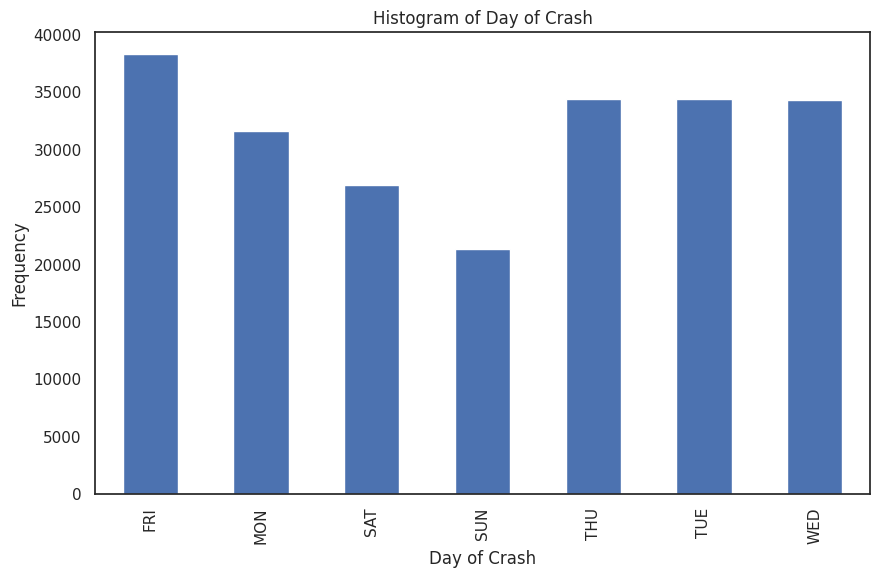

In [ ]:
le = LabelEncoder()
day_of_crash = le.fit_transform(car_crashes['DAYOFWEEK'])

ohe = OneHotEncoder(sparse=False)
ohe_day = ohe.fit_transform(day_of_crash.reshape(-1, 1))

lb = LabelBinarizer()
day_df = pd.DataFrame(ohe_day, columns=le.classes_)
print(day_df)

column_sums = day_df.sum()

# Plot histogram
plt.figure(figsize=(10, 6))
column_sums.plot(kind='bar')
plt.title('Histogram of Day of Crash')
plt.xlabel('Day of Crash')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show();


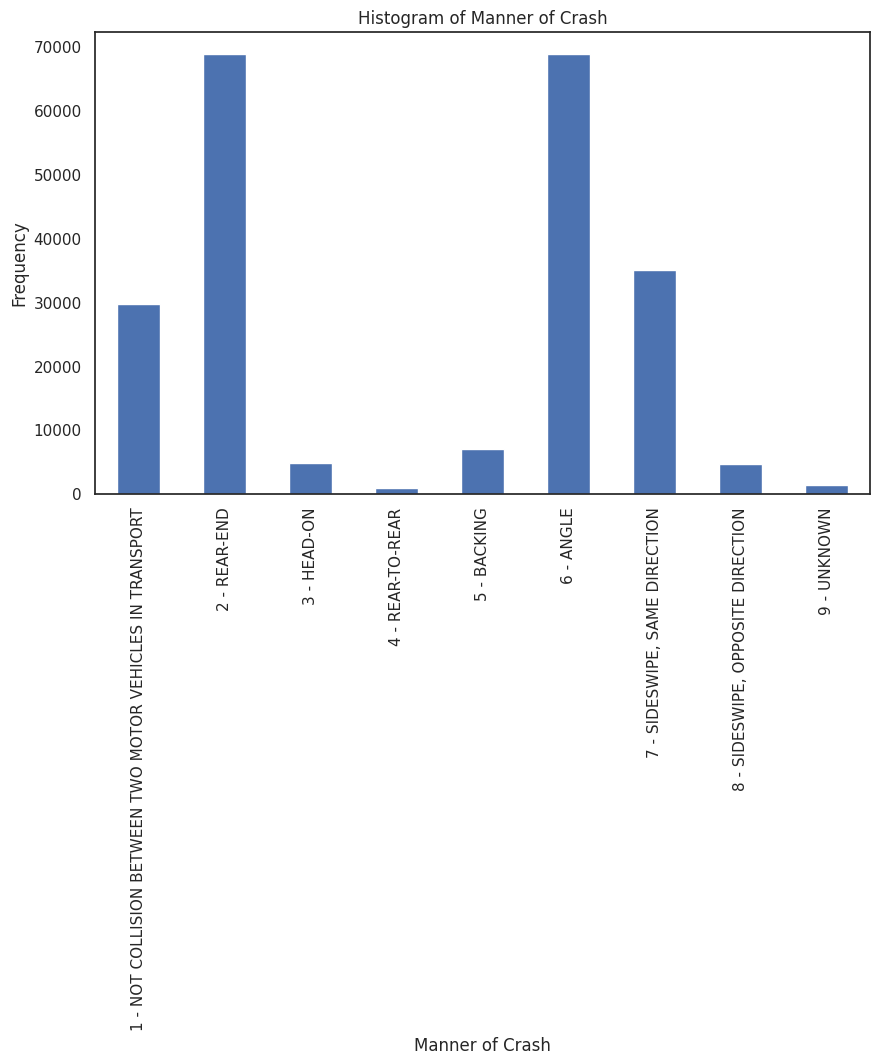

MANNEROFCRASH
2 - REAR-END                                                 68884
6 - ANGLE                                                    68807
7 - SIDESWIPE, SAME DIRECTION                                35066
1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES IN TRANSPORT    29743
5 - BACKING                                                   7003
3 - HEAD-ON                                                   4773
8 - SIDESWIPE, OPPOSITE DIRECTION                             4663
9 - UNKNOWN                                                   1289
4 - REAR-TO-REAR                                               853
Name: count, dtype: int64


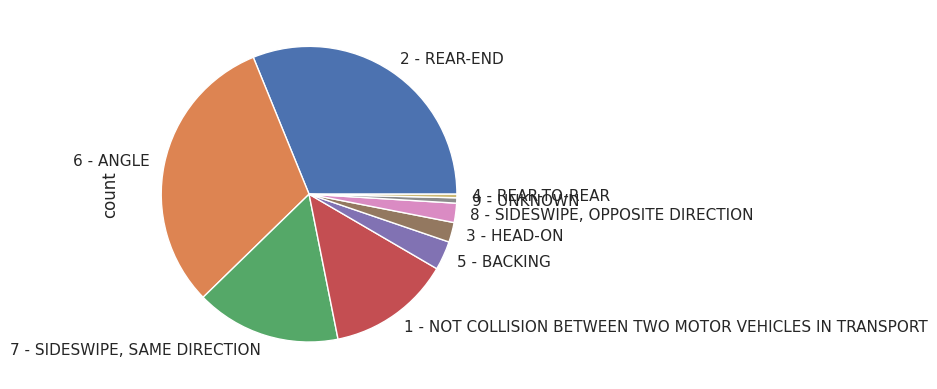

In [ ]:
column_sums = manner_df.sum()

plt.figure(figsize=(10, 6))
column_sums.plot(kind='bar')
plt.title('Histogram of Manner of Crash')
plt.xlabel('Manner of Crash')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show();

print(car_crashes["MANNEROFCRASH"].value_counts())
car_crashes["MANNEROFCRASH"].value_counts(dropna=False).plot.pie();

Replacement of Strings with Numerical values

In [ ]:
car_crashes["AGE"] = car_crashes["AGE"].replace({"UNDER 18":16,"18-25":21.5, "26-30":28.0,"31-40":35.5, "41-50":45.5, "51-60":55.5, "61-70": 65.5,"OVER 70": 75.5, "UNKNOWN": 0})

car_crashes["DAYOFWEEK"] = car_crashes["DAYOFWEEK"].replace({"SUN": 1, "MON": 2, "TUE": 3, "WED": 4, "THU": 5, "FRI": 6, "SAT": 7})

car_crashes["GENDER"] = car_crashes["GENDER"].replace({"F - FEMALE":-1, "FEMALE": -1, "M - MALE":1, "MALE": 1, "U - UNKNOWN":0})

car_crashes["CRASHSEVERITY"] = car_crashes["CRASHSEVERITY"].replace({"3 - PROPERTY DAMAGE ONLY (PDO)": 1, "5 - PROPERTY DAMAGE ONLY": 1, "3 - MINOR INJURY SUSPECTED":2, "2 - SERIOUS INJURY SUSPECTED":3, "4 - INJURY POSSIBLE":3,"2 - INJURY":4, "1 - FATAL INJURY":5,  "1 - FATAL": 5})
car_crashes["CRASHSEVERITY"] = car_crashes["CRASHSEVERITY"].astype(str).str[:1].astype(int)

# car_crashes["INJURIES"] = car_crashes["INJURIES"].replace({"1 - FATAL": 5, "5 - NO APPARENTY INJURY":1, "4 - POSSIBLE INJURY": 2, "3 - SUSPECTED MINOR INJURY": 3, "2 - SUSPECTED SERIOUS INJURY":4, "4 - POSSIBLE INJURY":2})
# car_crashes["INJURIES"] = car_crashes["INJURIES"].astype(str).str[:1].astype(int)


car_crashes["LIGHTCONDITIONSPRIMARY"] = car_crashes["LIGHTCONDITIONSPRIMARY"].replace({"9 - UNKNOWN": 0, "5 - DARK â€“ UNKNOWN ROADWAY LIGHTING":0, "6 - DARK â€“ UNKNOWN ROADWAY LIGHTING": 0, "8 - OTHER": 0, "9 - OTHER":0})
car_crashes["LIGHTCONDITIONSPRIMARY"] = car_crashes["LIGHTCONDITIONSPRIMARY"].astype(str).str[:1].astype(int)


car_crashes["MANNEROFCRASH"] = car_crashes["MANNEROFCRASH"].replace({"9 - UNKNOWN":0, "5 - BACKING":1, "4 - REAR-TO-REAR":2,'3 - HEAD-ON':8, '1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES IN TRANSPORT':6, '2 - REAR-END':5,'7 - SIDESWIPE, SAME DIRECTION':3,'8 - SIDESWIPE, OPPOSITE DIRECTION':4,'6 - ANGLE':7})
car_crashes["MANNEROFCRASH"] = car_crashes["MANNEROFCRASH"].astype(str).str[:1].astype(int)

car_crashes["ROADCONDITIONSPRIMARY"] = car_crashes["ROADCONDITIONSPRIMARY"].replace({"05 - SAND, MUD, DIRT, OIL, GRAVEL":-2,"01 - DRY":-1, "99 - UNKNOWN": 0, "09 - UNKNOWN": 0, "10 - OTHER": 0,"09 - OTHER":0, "02 - WET": 1,  "06 - WATER (STANDING, MOVING)":1, "03 - SNOW":2,"07 - SLUSH": 2, "04 - ICE": 3})

car_crashes["ROADSURFACE"] = car_crashes["ROADSURFACE"].replace({"6 - OTHER":0, "9 - OTHER": 0, "9 - UNKNOWN":0})
car_crashes["ROADSURFACE"] = car_crashes["ROADSURFACE"].astype(str).str[:1].astype(int)

car_crashes["WEATHER"] = car_crashes["WEATHER"].replace({"9 - OTHER/UNKNOWN": 0, "99 - OTHER/UNKNOWN":0})
car_crashes["WEATHER"] = car_crashes["WEATHER"].astype(str).str[:1].astype(int)

car_crashes["UNITTYPE"] = car_crashes["UNITTYPE"].replace({"99 - UNKNOWN":0, '99 - UNKNOWN OR HIT/SKIP': 0, '23 - PEDESTRIAN/SKATER':0,'25 - BICYCLE/PEDACYCLIST':0,'26 - PEDESTRIAN/SKATER':0,'26 - BICYCLE':0,"07 - MOTORCYCLE 2 WHEELED":0, '10 - MOPED OR MOTORIZED BICYCLE':0,'09 - MOTORCYCLE':0,'01 - SUB-COMPACT':1, '01 - PASSENGER CAR':1, '02 - COMPACT':2, '03 - SPORT UTILITY VEHICLE':3, '06 - SPORT UTILITY VEHICLE':3, '03 - MID SIZE':3, '04 - PICK UP':4,'07 - PICKUP':4,'04 - FULL SIZE':4,'05 - MINIVAN':5,'02 - PASSENGER VAN (MINIVAN)':5,'05 - CARGO VAN':5,'08 - VAN':5,'17 - TRACTOR/SEMI-TRAILER':7,'21 - BUS /VAN (9-15 SEATS INCLUDING THE DRIVER)':8,'22 - BUS (16+ SEATS, INCLUDING THE DRIVER)':8,'19 - BUS (16+ PASSENGERS)':8})
car_crashes["UNITTYPE"] = car_crashes["UNITTYPE"].astype(str).str[:2].astype(int)


#convert timestamp to hour of crash
car_crashes['CRASHDATE'] = pd.to_datetime(car_crashes["CRASHDATE"])
car_crashes['CRASHDATE'] = car_crashes["CRASHDATE"].dt.strftime("%H")
car_crashes['CRASHDATE'] = car_crashes["CRASHDATE"].astype(int)

car_crashes.columns = ["AGE", "CRASHHOUR",	"CRASHSEVERITY", 	"DAYOFWEEK", "GENDER"	, "LIGHTCONDITIONS", "MANNEROFCRASH",	"ROADCONDITIONS",	"ROADSURFACE",	"WEATHER",	"UNITTYPE" ]

<ipython-input-38-f8c38da863eb>:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  car_crashes['CRASHDATE'] = pd.to_datetime(car_crashes["CRASHDATE"])


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(car_crashes.drop("CRASHSEVERITY", axis=1), car_crashes["CRASHSEVERITY"], random_state=0, train_size = .75, test_size= .25)

print("X_train shape:\n",X_train.shape,"\n")
print("X_test shape:\n",X_test.shape,"\n")
print("y_train shape:\n",y_train.shape,"\n")
print("y_test shape:\n",y_test.shape,"\n")

print("X_train info:\n",X_train.info(),"\n")
print(y_train.info())
X_train.describe()

X_train shape:
 (165810, 10) 

X_test shape:
 (55271, 10) 

y_train shape:
 (165810,) 

y_test shape:
 (55271,) 

<class 'pandas.core.frame.DataFrame'>
Index: 165810 entries, 110448 to 232368
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AGE              165810 non-null  float64
 1   CRASHHOUR        165810 non-null  int64  
 2   DAYOFWEEK        165810 non-null  int64  
 3   GENDER           165810 non-null  int64  
 4   LIGHTCONDITIONS  165810 non-null  int64  
 5   MANNEROFCRASH    165810 non-null  int64  
 6   ROADCONDITIONS   165810 non-null  int64  
 7   ROADSURFACE      165810 non-null  int64  
 8   WEATHER          165810 non-null  int64  
 9   UNITTYPE         165810 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 13.9 MB
X_train info:
 None 

<class 'pandas.core.series.Series'>
Index: 165810 entries, 110448 to 232368
Series name: CRASHSEVERITY
Non-Null Count   Dtype
------------

,AGE,CRASHHOUR,DAYOFWEEK,GENDER,LIGHTCONDITIONS,MANNEROFCRASH,ROADCONDITIONS,ROADSURFACE,WEATHER,UNITTYPE
count,165810.000000,165810.000000,165810.000000,165810.000000,165810.000000,165810.000000,165810.000000,165810.000000,165810.000000,165810.000000
mean,37.834597,13.502823,4.130740,0.088427,1.719058,5.312544,-0.474911,1.845986,1.739147,3.244436
std,16.157739,5.281768,1.876806,0.995825,1.219104,1.679143,0.938277,0.374606,1.240272,2.486532
min,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000
25%,21.500000,10.000000,3.000000,-1.000000,1.000000,5.000000,-1.000000,2.000000,1.000000,2.000000
50%,35.500000,14.000000,4.000000,1.000000,1.000000,5.000000,-1.000000,2.000000,1.000000,3.000000
75%,45.500000,17.000000,6.000000,1.000000,3.000000,7.000000,-1.000000,2.000000,2.000000,3.000000
max,75.500000,23.000000,7.000000,1.000000,6.000000,8.000000,3.000000,5.000000,9.000000,27.000000


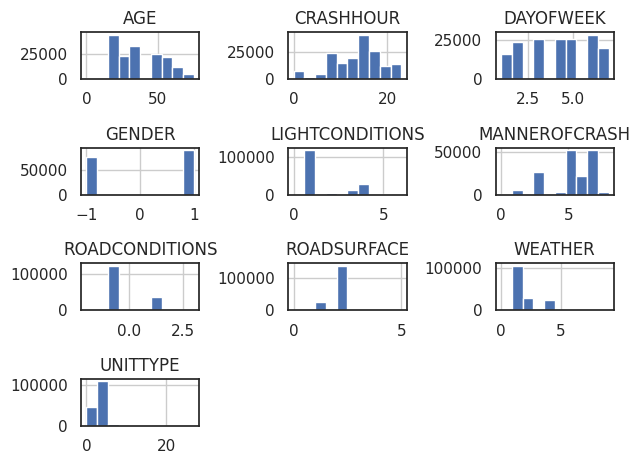

In [ ]:
X_train.hist()
plt.tight_layout()


Pie chart for the distribution of injuries reported
Not sure whether the abundance of no injury reported is skewing the data too much for meaningful analysis

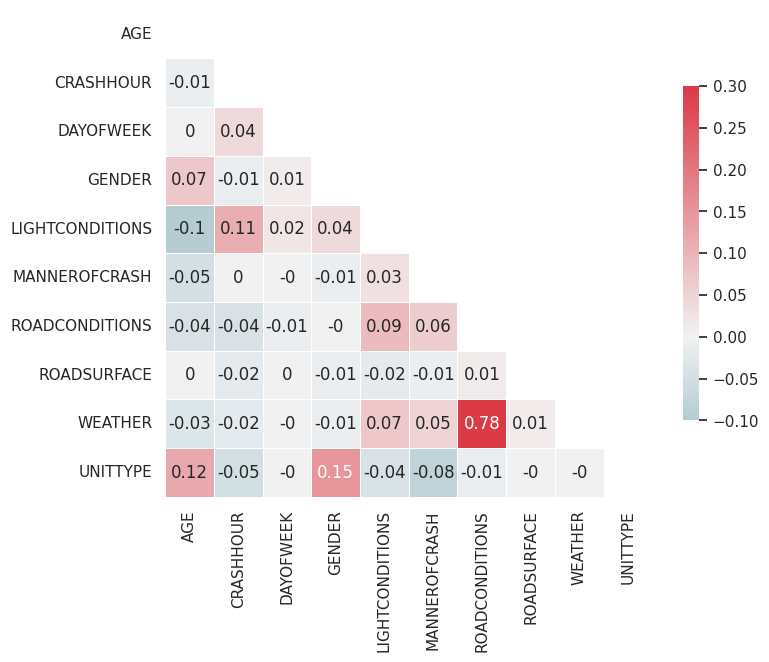

In [ ]:
# show correlation between the features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train.corr().round(2)

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

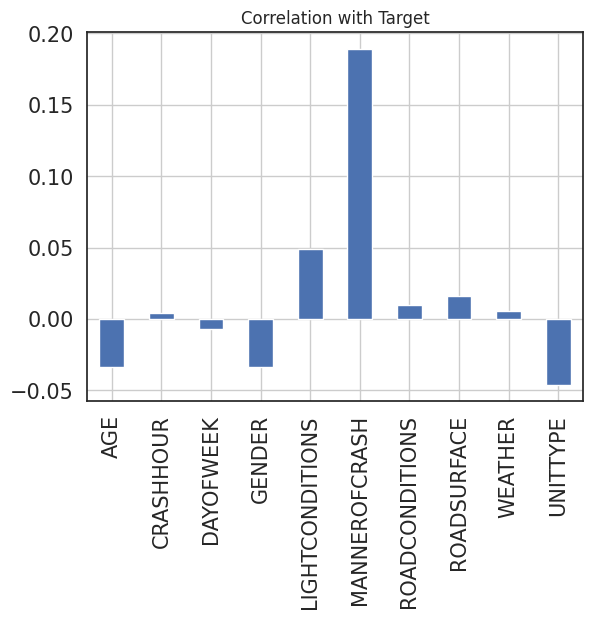

In [ ]:
# showing correlation of multiple features with one target
X_train.corrwith(y_train, numeric_only=True).plot.bar(
        title = "Correlation with Target", fontsize = 15,
        rot = 90, grid = True);

Mean: 1
Median: 1
Mode: 1
Standard Deviation: 1.222507685544386
Variance: 1.494525041215091


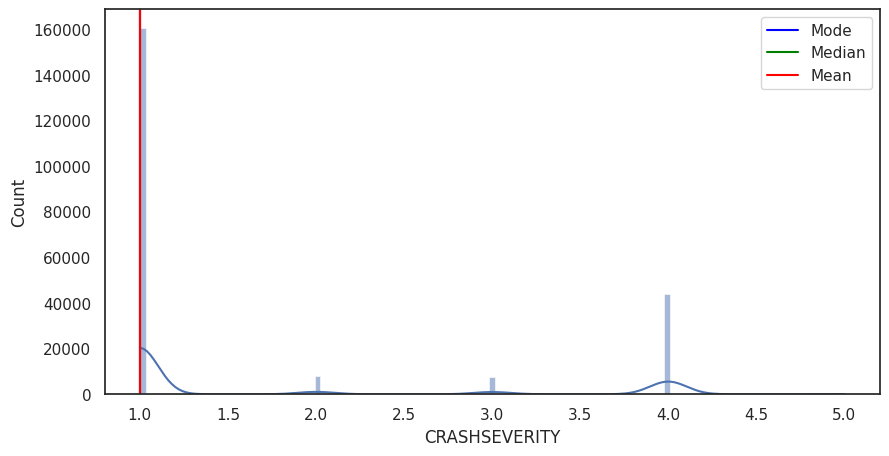

In [ ]:
sev_mean=int(np.mean(car_crashes['CRASHSEVERITY']))
sev_med=int(car_crashes['CRASHSEVERITY'].median())
sev_mode=car_crashes['CRASHSEVERITY'].mode()[0]
sev_std=car_crashes['CRASHSEVERITY'].std()
sev_var=car_crashes['CRASHSEVERITY'].var()

print('Mean:',sev_mean )
print('Median:',sev_med )
print('Mode:', sev_mode)
print('Standard Deviation:', sev_std)
print('Variance:',sev_var )



fig = plt.figure(figsize=(10,5))
sns.histplot(car_crashes['CRASHSEVERITY'], kde=True)
plt.axvline(x=sev_mode, color='blue', label='Mode')
plt.axvline(x=sev_med, color='green', label='Median')
plt.axvline(x=sev_mean, color='red', label='Mean')
plt.legend()
plt.show()


Skewness: 1.2440475892065705
Kurtosis: -0.31704850611991153


<ipython-input-44-0583b7b5546c>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_crashes['CRASHSEVERITY'], label=f'Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}')


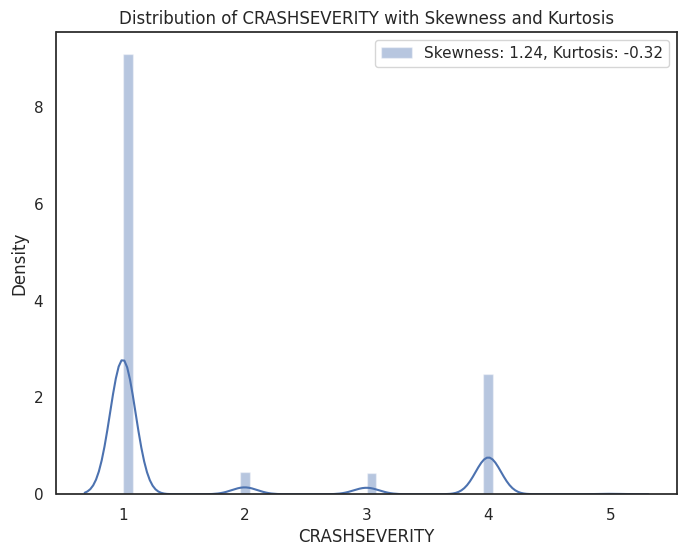

In [ ]:
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

skewness = skew(car_crashes['CRASHSEVERITY'])
kurt = kurtosis(car_crashes['CRASHSEVERITY'])

print("Skewness:", skewness)
print("Kurtosis:", kurt)

plt.figure(figsize=(8, 6))
sns.distplot(car_crashes['CRASHSEVERITY'], label=f'Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}')
plt.title('Distribution of CRASHSEVERITY with Skewness and Kurtosis')
plt.xlabel('CRASHSEVERITY')
plt.ylabel('Density')
plt.legend()
plt.show()

Ran into issue where the majority of car crashes do not result in major injury or fatality

Need to use logarithms to adjust

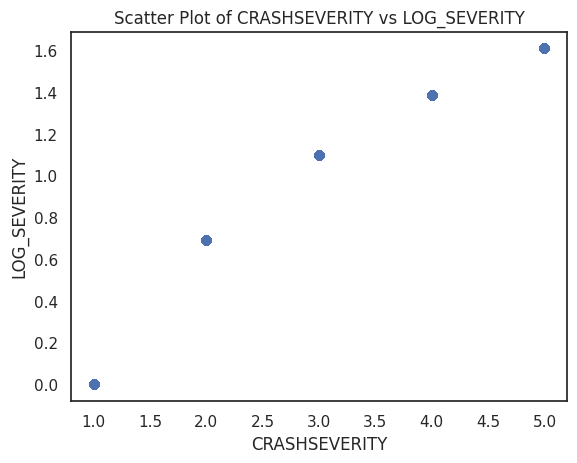

In [ ]:
car_crashes['LOG_SEVERITY'] = np.log(car_crashes['CRASHSEVERITY'])

plt.scatter(car_crashes['CRASHSEVERITY'], car_crashes['LOG_SEVERITY'])
plt.xlabel('CRASHSEVERITY')
plt.ylabel('LOG_SEVERITY')
plt.title('Scatter Plot of CRASHSEVERITY vs LOG_SEVERITY')
plt.show()

car_crashes = car_crashes.drop(columns=['LOG_SEVERITY'])

{0: 'Unkown', 1: 'BACKING', 2: 'REAR-TO-REAR', 3: 'SIDESWIPE, SAME DIRECTION', 4: 'SIDESWIPE, OPPOSITE DIRECTION', 5: 'REAR-END', 6: 'NOT COLLISION BETWEEN TWO MOTOR VEHICLES IN TRANSPORT', 7: 'ANGLE', 8: 'HEAD-ON'}
MANNEROFCRASH
7    16121
5    13478
6     8889
3     2592
8     1899
4      816
1      383
2      132
0      129
Name: count, dtype: int64


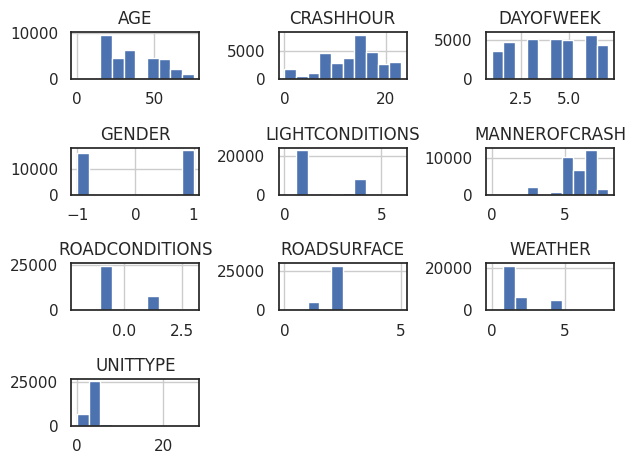

In [ ]:
fatal_crashes = car_crashes[car_crashes["CRASHSEVERITY"] >= 4]
print({0: "Unkown",1:"BACKING",2: "REAR-TO-REAR",3:'SIDESWIPE, SAME DIRECTION',4:'SIDESWIPE, OPPOSITE DIRECTION',5:"REAR-END",6:'NOT COLLISION BETWEEN TWO MOTOR VEHICLES IN TRANSPORT',7:'ANGLE', 8:'HEAD-ON'})
print(fatal_crashes["MANNEROFCRASH"].value_counts())

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(fatal_crashes.drop("CRASHSEVERITY", axis=1), fatal_crashes["CRASHSEVERITY"], random_state=0, train_size = .75, test_size= .25)

X_train_f.hist()
plt.tight_layout()


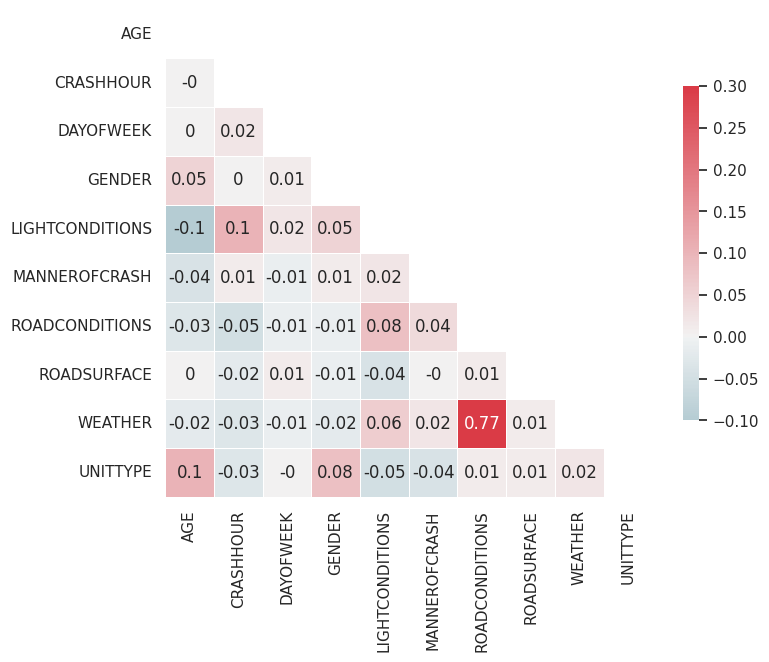

In [ ]:
# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train_f.corr().round(2)

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

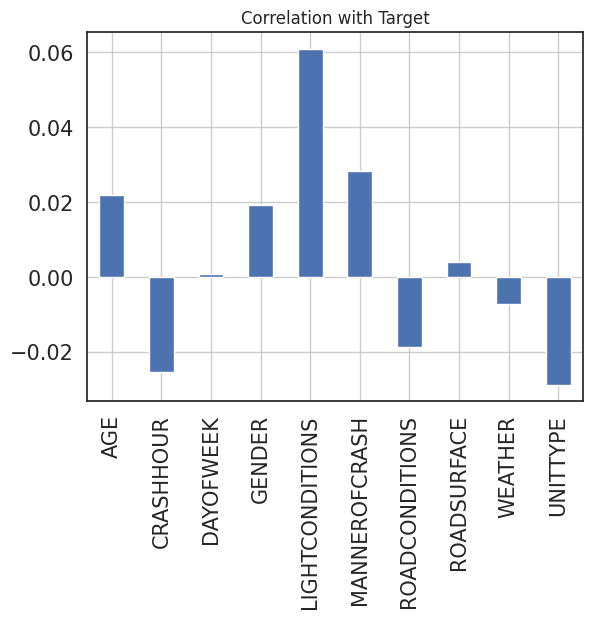

In [ ]:
# showing correlation of multiple features with one target
X_train_f.corrwith(y_train, numeric_only=True).plot.bar(
        title = "Correlation with Target", fontsize = 15,
        rot = 90, grid = True);